In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
from scipy.special import expit
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
from DosHelper import *
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [2]:
thetai = 1.79
funcreturned = ret_alpha_beta_Ev(thetai)
alpha, beta = funcreturned[0]  #Note NO NEED to multiply 0.5 to the values in the returned alphabeta
Ev = funcreturned[1]
thetarad = thetai * IN_RADIAN

verbose_string = funcreturned[2]
print("verbose_string is ", verbose_string)

BW = 3.0 #consider a rough estimate of the bandwidth to be 3eV
Eset = BW*np.logspace(-12,0,13*10000)
print(Ev)

verbose_string is  (array([0.02219556, 0.03907102]), 63, 2)
0.04276117650113031


### DoS 
#### The cone dos is $A x$, and the vhs dos is $P \log\left|\frac{B-E_v}{x-E_v}\right|$. They meet at the solution $x = E_*$ . 
The Dos then is 
$\left[\Theta(E) - \Theta(E - E_*)\right] A E + \Theta(E-E_*) P \log\left|\frac{B-E_v}{E-E_v}\right|$ 

Estar =  0.03420894120090425
Ev =  0.04276117650113031
DOS at zero energy:  1.2524988083359754e-11
Smoothing parameter is  350.08564656299694


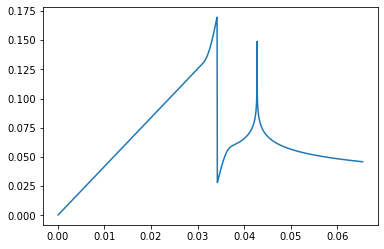

In [22]:
A = DiracConeDoS_TBLG(1, thetarad)
P = (12/(4*np.pi**2)) * (1/(np.sqrt(np.abs(alpha*beta))))

eps = 1e-2
def forbisection(x,A,P,BW,Ev):
    return A*x/P - (np.log(np.abs((BW-Ev)/(x-Ev))))

#Estar = bisect(forbisection,0+eps,Ev-eps,args=(A,P,BW,Ev))
Estar = newton(forbisection,0,args=(A,P,BW,Ev))
Estar = 0.8*Ev
print("Estar = ",Estar)
#DoS = np.array([(np.heaviside(mu,0) - np.heaviside(mu-Estar,0)) * A * np.abs(mu) + 
#       np.heaviside(mu - Estar,0) * P * np.log(np.abs((BW-Ev)/(mu-Ev))) for mu in Eset])

s = 50/(A * Estar)
#DoS = np.array([(expit((mu)*s) - expit((mu-Estar)*s)) * A * np.abs(mu) + 
#       expit((mu - Estar)*s) * P * np.log(np.abs((BW-Ev)/(mu-Ev))) for mu in Eset])

N=2
DoS = np.array([(1 - smoothstep(mu,0.999*Estar,1.001*Estar,N)) * A * np.abs(mu) + 
       smoothstep(mu,0.9*Estar,1.1*Estar,N) * P * np.log(np.abs((BW-Ev)/(mu-Ev))) for mu in Eset])
#startindex = 108000
#stopindex = 112000
#startindex = 0
#stopindex= 140000
startindex, stopindex = [81000,112000]
plt.plot(Eset[startindex:stopindex],DoS[startindex:stopindex])
print("Ev = ", Ev)
print("DOS at zero energy: ", DoS[0])
print("Smoothing parameter is ", s)

### Condition for root: Cone(Ev) > vhs(0)

In [4]:
coneEv = A * np.abs(Ev)
vhSzero = P * np.log(np.abs((BW-Ev)/(0-Ev)))
coneEv - vhSzero

0.13863227950674425

### Compare slopes at $E_*$

In [5]:
def slope_line(x):
    return A
def slope_log(x) :
    return P * ((Ev-x)/(BW-Ev)) * (1/(Ev-x)**2)
print([slope_line(Estar), slope_log(Estar)])
#eqslop = bisect(lambda x: slope_line(x)-slope_log(x), 0, Ev-eps)
#slope_log(eqslop+10*eps)

#Estar1 = bisect(forbisection,eqslop,Ev-eps,args=(A,P,BW,Ev))


[4.174996027786585, 0.37235953997734067]


<AxesSubplot:ylabel='Density'>

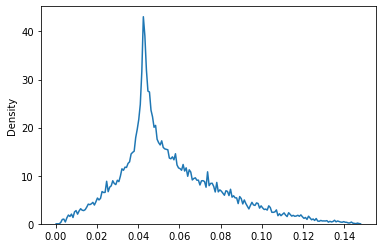

In [6]:
X,Y,Z = data_for_contours(thetai)
ser = pd.Series(Z.flatten())
sns.kdeplot(ser,bw_adjust=0.01)

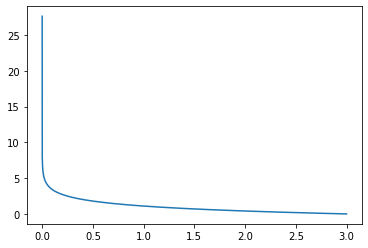

In [7]:
plt.plot(Eset, -np.log(Eset/3))

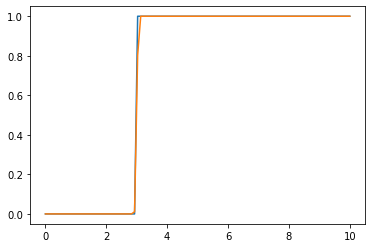

In [20]:
x = np.linspace(0,10,100)

eps = 0.1
y = smoothstep(x,x_min=3,x_max=4,N=2) * x**2 
#plt.plot(x,y)
plt.plot(x, np.heaviside(x-3,0))
plt.plot(x, smoothstep(x, 3-eps,3+eps, N=3))